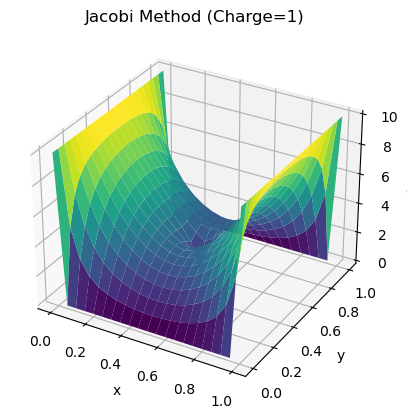

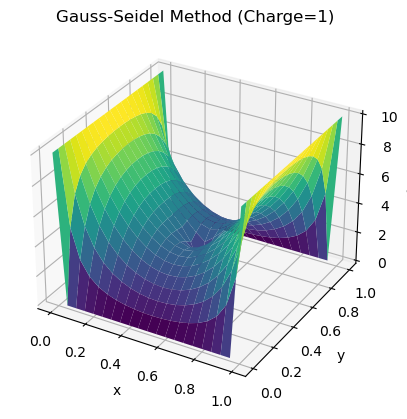

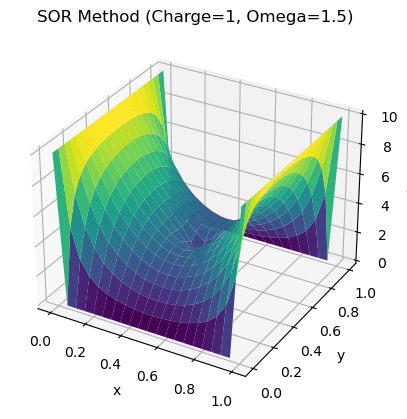

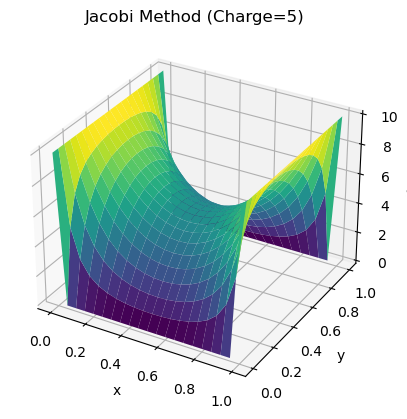

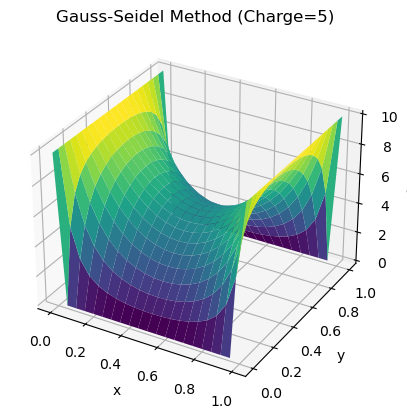

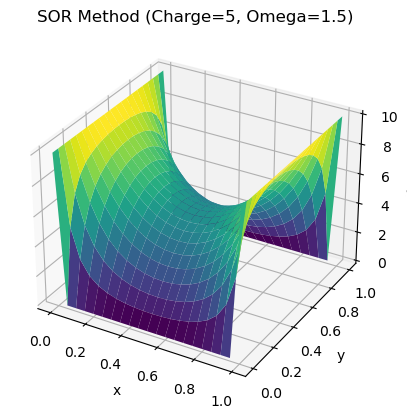

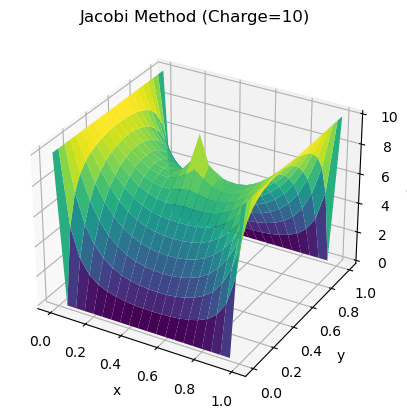

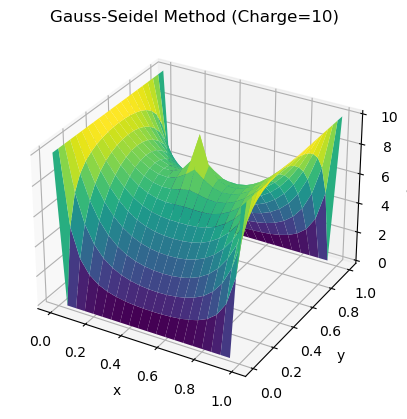

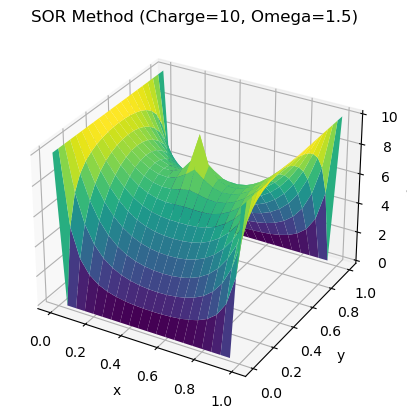

jacobi method converged for charge 1 in 698 iterations
gauss_seidel method converged for charge 1 in 370 iterations
sor method converged for charge 1 in 127 iterations
jacobi method converged for charge 5 in 706 iterations
gauss_seidel method converged for charge 5 in 374 iterations
sor method converged for charge 5 in 128 iterations
jacobi method converged for charge 10 in 715 iterations
gauss_seidel method converged for charge 10 in 378 iterations
sor method converged for charge 10 in 130 iterations


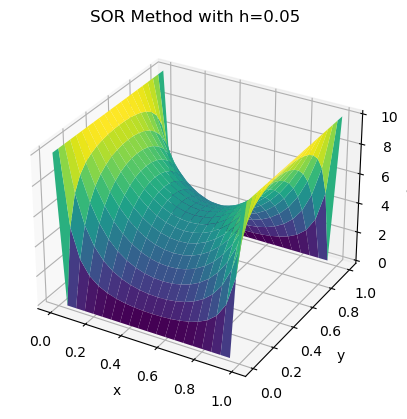

IndexError: index 11 is out of bounds for axis 1 with size 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
Lx = 1.0 
Ly = 1.0  
Nx = 21 
Ny = 21  
hx = Lx / (Nx - 1)  
hy = Ly / (Ny - 1)  

# Initialize grid
V = np.zeros((Nx, Ny))


V[:, 0] = 0   
V[:, -1] = 0   
V[0, :] = 10   
V[-1, :] = 10 

# Charge in the middle
charge_position = (Nx// 2, Ny // 2)
charge_values = [1, 5, 10]  #charge in C

# Function to plot the potential
def plot_potential(V, title):
    x=np.linspace(0, Lx, Nx) # we wanted it to be unity and number of grid pts will be Nx
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    Z = V.T
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x, y)')
    plt.show()

# Jacobi method
def jacobi(V, charge_value, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = 0.25 * (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Gauss-Seidel method
def gauss_seidel(V, charge_value, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = 0.25 * (V_new[i+1, j] + V_new[i-1, j] + V_new[i, j+1] + V_new[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Successive Over-Relaxation (SOR) method
def sor(V, charge_value, omega=1.5, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = (1 - omega) * V_new[i, j] + omega * 0.25 * (V_new[i+1, j] + V_new[i-1, j] + V_new[i, j+1] + V_new[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Run and plot for different charge values
for charge_value in charge_values:
    V_jacobi = jacobi(V, charge_value)
    plot_potential(V_jacobi, f'Jacobi Method (Charge={charge_value})')
    
    V_gauss_seidel = gauss_seidel(V, charge_value)
    plot_potential(V_gauss_seidel, f'Gauss-Seidel Method (Charge={charge_value})')
    
    V_sor = sor(V, charge_value)
    plot_potential(V_sor, f'SOR Method (Charge={charge_value}, Omega=1.5)')

# Investigate convergence
def investigate_convergence():
    iterations = []
    for charge_value in charge_values:
        for method in [jacobi, gauss_seidel, sor]:
            V_new = V.copy()
            V_new[charge_position] = charge_value
            for iteration in range(1, 1001):
                V_old = V_new.copy()
                if method == jacobi:
                    V_new = jacobi(V, charge_value, max_iterations=iteration)
                elif method == gauss_seidel:
                    V_new = gauss_seidel(V, charge_value, max_iterations=iteration)
                else:
                    V_new = sor(V, charge_value, max_iterations=iteration)
                
                if np.sum(np.abs(V_new - V_old)) < 1e-4:
                    iterations.append((method.__name__, charge_value, iteration))
                    break
    
    for method_name, charge_value, iteration in iterations:
        print(f"{method_name} method converged for charge {charge_value} in {iteration} iterations")

investigate_convergence()

# Effect of varying grid spacing
def investigate_grid_spacing():
    hs = [0.05, 0.1, 0.2]
    for h in hs:
        Nx = int(Lx / h) + 1
        Ny = int(Ly / h) + 1
        V = np.zeros((Nx, Ny))
        V[:, 0] = 0
        V[:, -1] = 0
        V[0, :] = 10
        V[-1, :] = 10
        charge_position = (Nx // 2, Ny // 2)
        
        V_sor = sor(V, 5, omega=1.5)
        plot_potential(V_sor, f'SOR Method with h={h}')

investigate_grid_spacing()


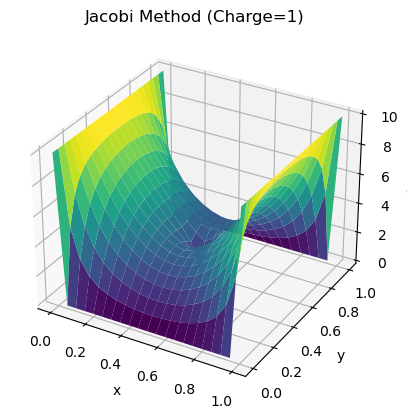

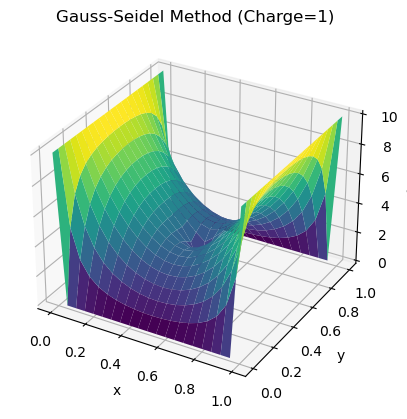

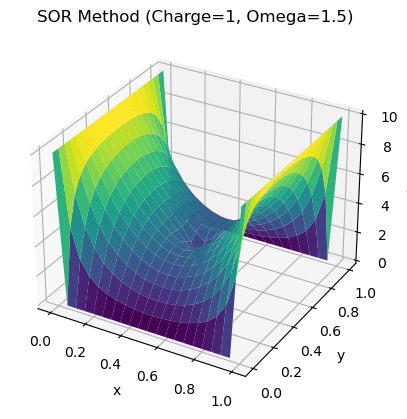

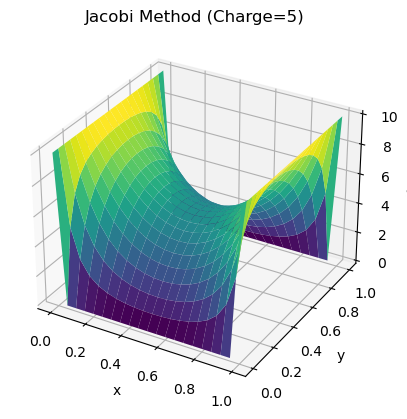

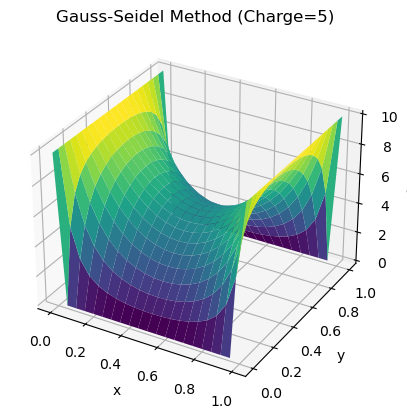

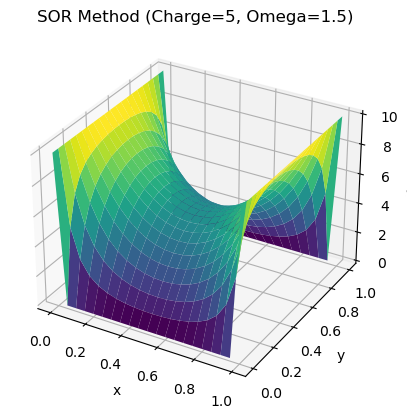

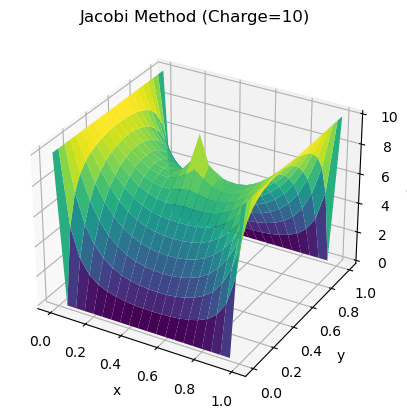

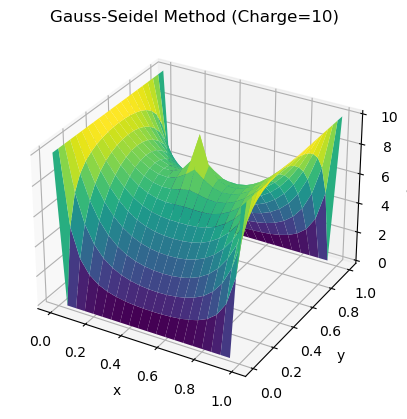

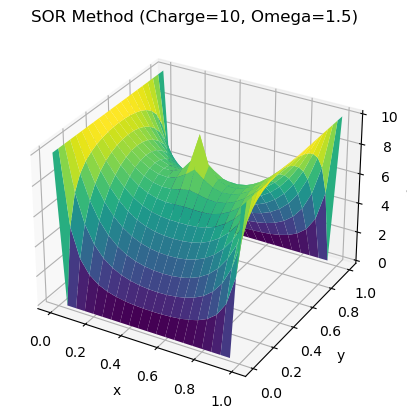

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
Lx = 1.0  # Length of the rectangle in x-direction
Ly = 1.0  # Length of the rectangle in y-direction
Nx = 21   # Number of grid points in x-direction (odd number)
Ny = 21   # Number of grid points in y-direction (odd number)
hx = Lx / (Nx - 1)  # Grid spacing in x-direction
hy = Ly / (Ny - 1)  # Grid spacing in y-direction

# Initialize grid
V = np.zeros((Nx, Ny))

# Boundary conditions
V[:, 0] = 0    # Short sides grounded (0V)
V[:, -1] = 0   # Short sides grounded (0V)
V[0, :] = 10   # Long sides grounded (10V)
V[-1, :] = 10  # Long sides grounded (10V)

# Charge in the middle
charge_position = (Nx // 2, Ny // 2)
charge_values = [1, 5, 10]  # Different sensible values

# Function to plot the potential
def plot_potential(V, title):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    Z = V.T
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x, y)')
    plt.show()

# Jacobi method
def jacobi(V, charge_value, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = 0.25 * (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Gauss-Seidel method
def gauss_seidel(V, charge_value, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = 0.25 * (V_new[i+1, j] + V_new[i-1, j] + V_new[i, j+1] + V_new[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Successive Over-Relaxation (SOR) method
def sor(V, charge_value, omega=1.5, max_iterations=1000, tolerance=1e-4):
    V_new = V.copy()
    V_new[charge_position] = charge_value
    
    for iteration in range(max_iterations):
        V_old = V_new.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i, j) == charge_position:
                    continue
                V_new[i, j] = (1 - omega) * V_new[i, j] + omega * 0.25 * (V_new[i+1, j] + V_new[i-1, j] + V_new[i, j+1] + V_new[i, j-1])
        
        if np.sum(np.abs(V_new - V_old)) < tolerance:
            break
    
    return V_new

# Run and plot for different charge values
for charge_value in charge_values:
    V_jacobi = jacobi(V, charge_value)
    plot_potential(V_jacobi, f'Jacobi Method (Charge={charge_value})')
    
    V_gauss_seidel = gauss_seidel(V, charge_value)
    plot_potential(V_gauss_seidel, f'Gauss-Seidel Method (Charge={charge_value})')
    
    V_sor = sor(V, charge_value)
    plot_potential(V_sor, f'SOR Method (Charge={charge_value}, Omega=1.5)')

# Investigate convergence
def investigate_convergence():
    iterations = []
    for charge_value in charge_values:
        for method in [jacobi, gauss_seidel, sor]:
            V_new = V.copy()
            V_new[charge_position] = charge_value
            for iteration in range(1, 1001):
                V_old = V_new.copy()
                if method == jacobi:
                    V_new = jacobi(V, charge_value, max_iterations=iteration)
                elif method == gauss_seidel:
                    V_new = gauss_seidel(V, charge_value, max_iterations=iteration)
                else:
                    V_new = sor(V, charge_value, max_iterations=iteration)
                
                if np.sum(np.abs(V_new - V_old)) < 1e-4:
                    iterations.append((method.__name__, charge_value, iteration))
                    break
    
    for method_name, charge_value, iteration in iterations:
        print(f"{method_name} method converged for charge {charge_value} in {iteration} iterations")

investigate_convergence()

# Effect of varying grid spacing
def investigate_grid_spacing():
    hs = [0.05, 0.1, 0.2]
    for h in hs:
        Nx = int(Lx / h) + 1
        Ny = int(Ly / h) + 1
        V = np.zeros((Nx, Ny))
        V[:, 0] = 0
        V[:, -1] = 0
        V[0, :] = 10
        V[-1, :] = 10
        charge_position = (Nx // 2, Ny // 2)
        
        V_sor = sor(V, 5, omega=1.5)
        plot_potential(V_sor, f'SOR Method with h={h}')

investigate_grid_spacing()
